In [6]:
import pandas as pd

#### Loading the Dataset (NFHS-5 State-wise CSVs) 

In [7]:
df=pd.read_csv(r"C:\Users\hp\Downloads\india_nhsv data.csv.txt")

C:\Users\hp\AppData\Local\Temp\ipykernel_23808\2210719983.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\hp\Downloads\india_nhsv data.csv.txt")


####  Filtering Relevant Indicators (Stunting, Wasting, Underweight)

In [8]:
child_indicators= [
 'Children under 5 years who are stunted (height for age) (%)',
 'Children under 5 years who are wasted (weight for height) (%)',
 'Children under 5 years who are underweight (weight for age) (%)'
]

In [9]:
filtered = df[df['Indicator'].isin(child_indicators)]


In [10]:
print(filtered.head())

                        State  ST_CEN_CD                District  \
72   Andaman & Nicobar Island         35                 Nicobar   
73   Andaman & Nicobar Island         35                 Nicobar   
75   Andaman & Nicobar Island         35                 Nicobar   
176  Andaman & Nicobar Island         35  North & Middle Andaman   
177  Andaman & Nicobar Island         35  North & Middle Andaman   

                     DISTRICT DT_CEN_CD  \
72                  Nicobar_1       1.0   
73                  Nicobar_1       1.0   
75                  Nicobar_1       1.0   
176  North & Middle Andaman_2       2.0   
177  North & Middle Andaman_2       2.0   

                                              Category  \
72   Child Feeding Practices and Nutritional Status...   
73   Child Feeding Practices and Nutritional Status...   
75   Child Feeding Practices and Nutritional Status...   
176  Child Feeding Practices and Nutritional Status...   
177  Child Feeding Practices and Nutrition

In [11]:
filtered_avg = filtered.groupby(['State', 'Indicator'], as_index=False)['NFHS 5'].mean()

In [12]:
child_health = filtered_avg.pivot(index='State', 
                                  columns='Indicator', 
                                  values='NFHS 5').reset_index()

In [13]:
child_health = child_health.rename( columns={
                                 
    'Indicator': 'State',
    'Children under 5 years who are stunted (height for age) (%)': 'Stunted (%)',
    'Children under 5 years who are underweight (weight for age) (%)': 'Underweight (%)',
    'Children under 5 years who are wasted (weight for height) (%)': 'Wasted (%)'
})

In [14]:
print(child_health)

Indicator                     State  Stunted (%)  Underweight (%)  Wasted (%)
0          Andaman & Nicobar Island    23.233333        28.266667   18.433333
1                    Andhra Pradesh    30.384615        28.769231   16.084615
2                 Arunachal Pradesh    26.750000        14.115000   13.370000
3                             Assam    35.696970        31.609091   20.687879
4                             Bihar    42.589474        41.726316   24.247368
5                        Chandigarh    25.300000        20.600000    8.400000
6                     Chhattisgarh     35.674074        33.218519   19.085185
7              Dadra & Nagar Haveli    42.400000        42.100000   20.900000
8                       Daman & Diu    31.950000        28.900000   21.300000
9                               Goa    26.250000        23.400000   19.550000
10                          Gujarat    38.660606        40.330303   26.139394
11                          Haryana    26.550000        20.91363

#### Cleaning Column Names

In [15]:
df.columns = df.columns.str.strip()

#### Handling Missing Values

In [16]:
child_health.isnull().sum()

Indicator
State              0
Stunted (%)        0
Underweight (%)    0
Wasted (%)         0
dtype: int64

In [17]:
child_health.columns.isnull().sum()

0

In [18]:
print(df.columns)

Index(['State', 'ST_CEN_CD', 'District', 'DISTRICT', 'DT_CEN_CD', 'Category',
       'Indicator', 'NFHS 5', 'NFHS 4'],
      dtype='object')


In [19]:
print(child_health.columns.tolist())

['State', 'Stunted (%)', 'Underweight (%)', 'Wasted (%)']


#### Statistical Overview of Child Nutrition Outcomes in India

In [20]:
child_health.describe()

Indicator,Stunted (%),Underweight (%),Wasted (%)
count,37.000000,37.000000,37.000000
mean,31.594345,26.580603,17.115402
std,5.620404,7.982695,4.576838
min,23.233333,13.650000,8.400000
25%,26.550000,20.600000,13.370000
50%,31.653333,26.162500,18.045455
75%,35.108333,32.317333,19.550000
max,42.981818,42.100000,26.139394


In [21]:
child_health[['Stunted (%)','Underweight (%)','Wasted (%)']].corr()

Indicator,Stunted (%),Underweight (%),Wasted (%)
Indicator,,,
Stunted (%),1.000000,0.795627,0.604873
Underweight (%),0.795627,1.000000,0.858020
Wasted (%),0.604873,0.858020,1.000000


In [22]:
child_health.nlargest(5, 'Stunted (%)')


Indicator,State,Stunted (%),Underweight (%),Wasted (%)
22,Meghalaya,42.981818,25.436364,13.690909
4,Bihar,42.589474,41.726316,24.247368
7,Dadra & Nagar Haveli,42.400000,42.100000,20.900000
14,Jharkhand,40.187500,40.400000,23.108333
34,Uttar Pradesh,39.634667,32.317333,17.692000


In [23]:

child_health.nsmallest(5, 'Stunted (%)')

Indicator,State,Stunted (%),Underweight (%),Wasted (%)
0,Andaman & Nicobar Island,23.233333,28.266667,18.433333
16,Kerala,23.278571,19.371429,15.064286
21,Manipur,24.622222,13.766667,9.944444
30,Sikkim,24.900000,13.700000,11.975000
13,Jammu & Kashmir,24.904762,20.061905,18.319048


#### Visualization of Child Malnutrition Patterns in India

In [24]:
import matplotlib.pyplot as plt    # For plotting
import seaborn as sns      # For advanced visualization
 

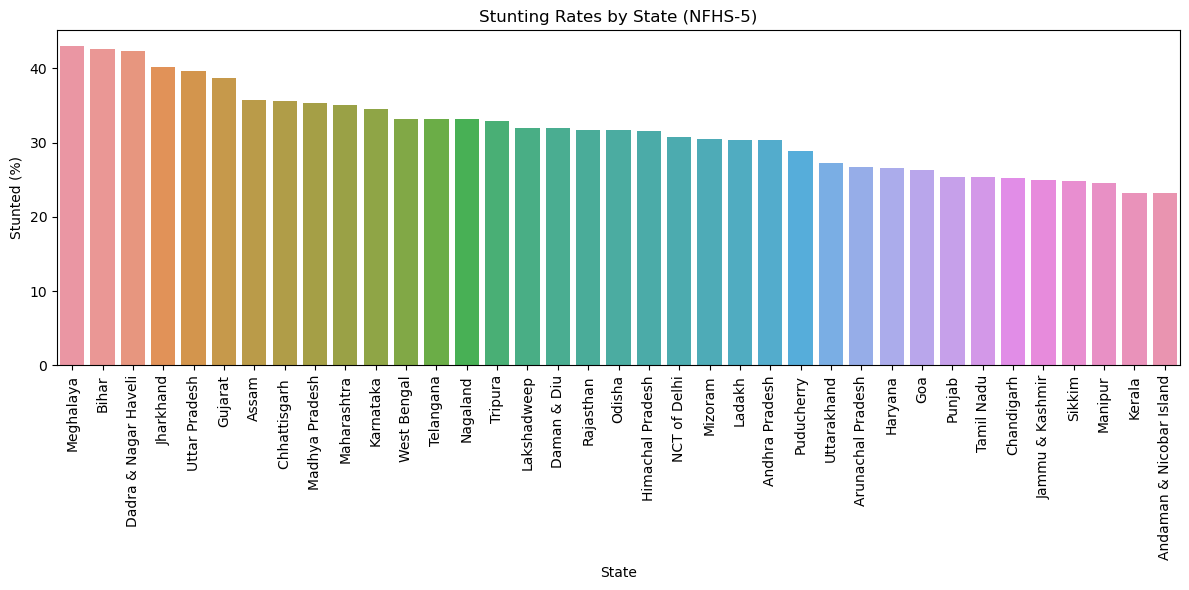

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=child_health.sort_values("Stunted (%)", ascending=False),
            x="State", y="Stunted (%)")
plt.xticks(rotation=90)
plt.title("Stunting Rates by State (NFHS-5)")
plt.tight_layout()
plt.show()

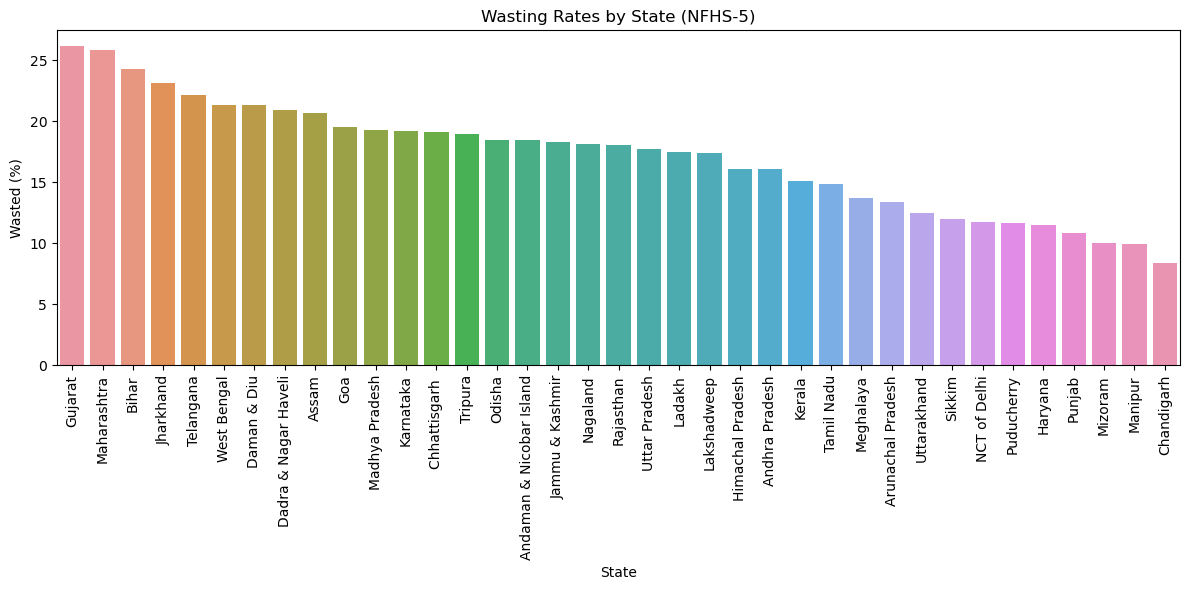

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=child_health.sort_values("Wasted (%)", ascending=False),
            x="State", y="Wasted (%)")
plt.xticks(rotation=90)
plt.title("Wasting Rates by State (NFHS-5)")
plt.tight_layout()
plt.show()

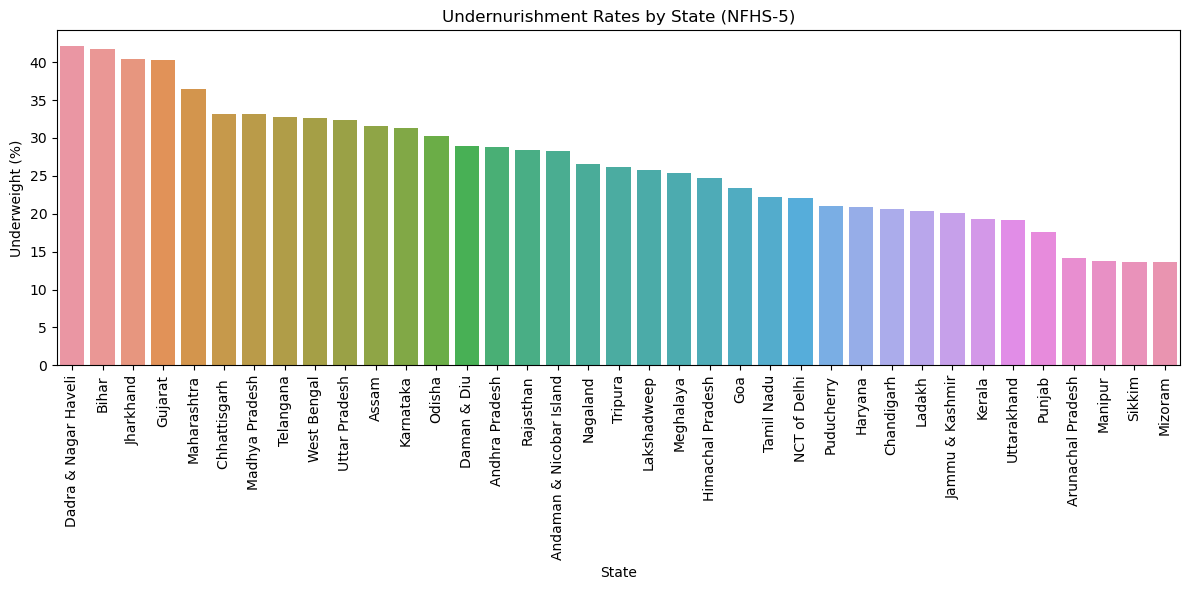

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(data=child_health.sort_values("Underweight (%)", ascending=False),
            x="State", y="Underweight (%)")
plt.xticks(rotation=90)
plt.title("Undernurishment Rates by State (NFHS-5)")
plt.tight_layout()
plt.show()

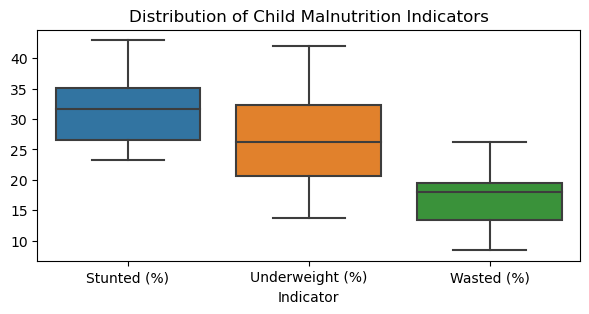

In [27]:
plt.figure(figsize=(7,3 ))
sns.boxplot(data=child_health[["Stunted (%)","Underweight (%)","Wasted (%)"]])
plt.title("Distribution of Child Malnutrition Indicators")
plt.show()

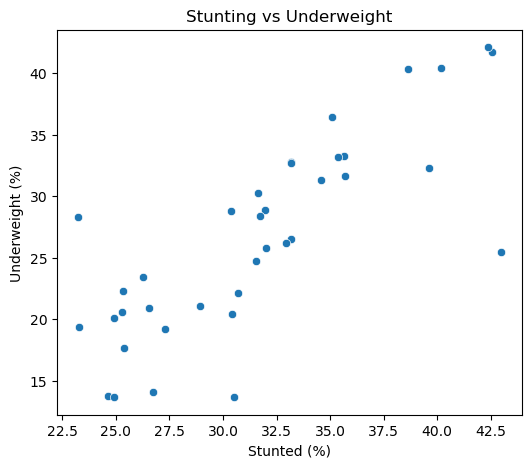

In [28]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=child_health,
    x="Stunted (%)", y="Underweight (%)"
)
plt.title("Stunting vs Underweight")
plt.show()

You can see relationship/correlation visually — e.g., if dots trend upward, 
higher stunting is associated with higher underweight.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


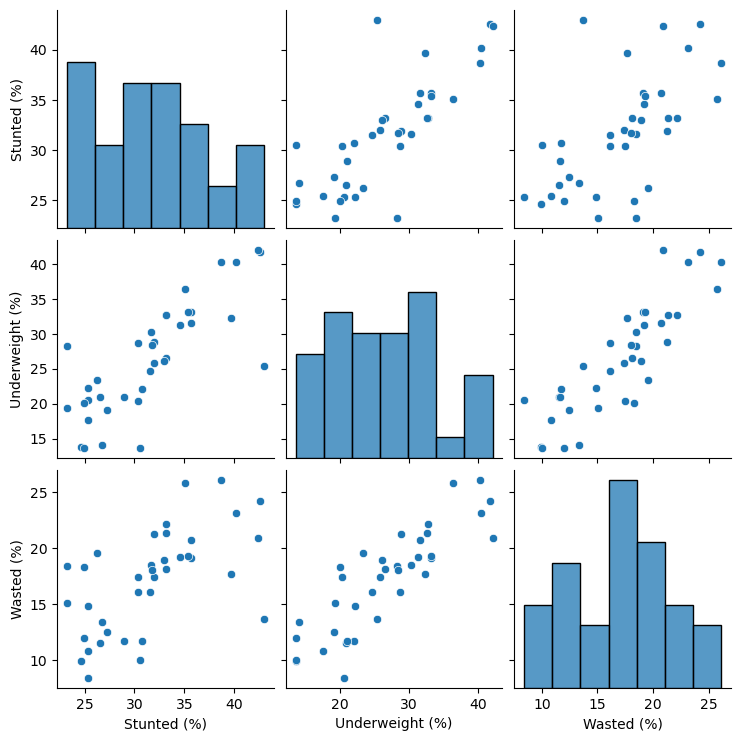

In [29]:
sns.pairplot(child_health[["Stunted (%)","Underweight (%)","Wasted (%)"]])
plt.show()

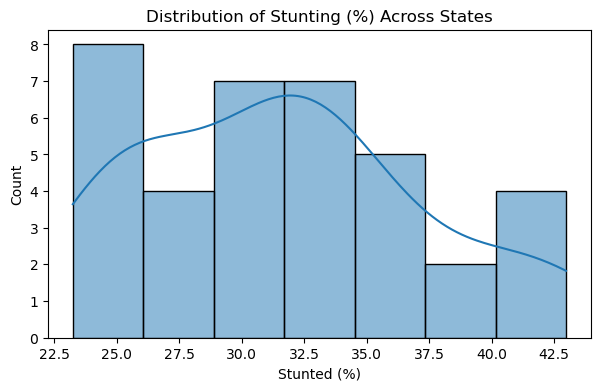

In [30]:
plt.figure(figsize=(7, 4))
sns.histplot(child_health["Stunted (%)"], kde=True)
plt.title("Distribution of Stunting (%) Across States")
plt.show()

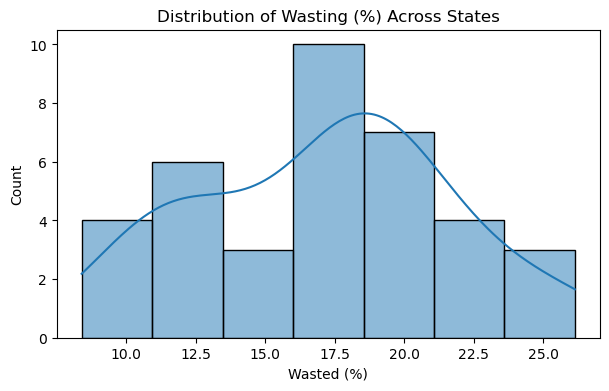

In [31]:
plt.figure(figsize=(7, 4))
sns.histplot(child_health["Wasted (%)"], kde=True)
plt.title("Distribution of Wasting (%) Across States")
plt.show()

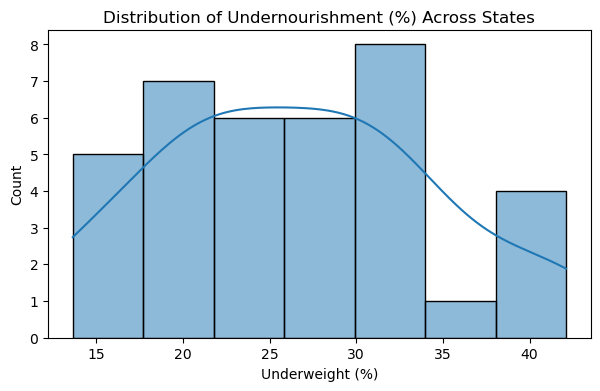

In [33]:
plt.figure(figsize=(7, 4))
sns.histplot(child_health["Underweight (%)"], kde=True)
plt.title("Distribution of Undernourishment (%) Across States")
plt.show()                    

#### Impact of Maternal Health on Child Nutrition

In [34]:
maternalindicators= ['Women whose Body Mass Index (BMI) is below normal (BMI <18)',
'Pregnant women age 15-49 years who are anaemic',
'Mothers who had at least 4 antenatal care visits (%)',
'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (%)',
'Mothers who consumed iron folic acid for 180 days or more when they were pregnant (%)']

In [35]:
maternal_health=df[df['Indicator'].isin(maternalindicators)]

In [36]:
print(maternal_health.head())

                       State  ST_CEN_CD District   DISTRICT DT_CEN_CD  \
32  Andaman & Nicobar Island         35  Nicobar  Nicobar_1       1.0   
35  Andaman & Nicobar Island         35  Nicobar  Nicobar_1       1.0   
37  Andaman & Nicobar Island         35  Nicobar  Nicobar_1       1.0   
77  Andaman & Nicobar Island         35  Nicobar  Nicobar_1       1.0   
82  Andaman & Nicobar Island         35  Nicobar  Nicobar_1       1.0   

                            Category  \
32         Maternal and Child Health   
35         Maternal and Child Health   
37         Maternal and Child Health   
77       Nutritional Status of Women   
82  Anaemia among Children and Women   

                                            Indicator  NFHS 5  NFHS 4  
32  Mothers who had at least 4 antenatal care visi...    71.7    64.9  
35  Mothers who consumed iron folic acid for 180 d...    43.9     3.0  
37  Mothers who received postnatal care from a doc...    85.1    74.0  
77  Women whose Body Mass Index 

In [37]:
maternal_health = maternal_health.groupby(['State', 'Indicator'], as_index=False)['NFHS 5'].mean()

In [38]:
maternal_health=maternal_health.pivot(index='State',columns='Indicator',values='NFHS 5').reset_index()

In [39]:
maternal_health=maternal_health.rename(columns={'Women whose Body Mass Index (BMI) is below normal (BMI <18)':'women BMI<18',
                                                 'Pregnant women age 15-49 years who are anaemic':'anaemic women',
                                                 'Mothers who had at least 4 antenatal care visits (%)':'mothers>4anc visits' ,
                                             'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (%)': 'rcvd pnc care' ,
                                             'Mothers who consumed iron folic acid for 180 days or more when they were pregnant (%)':'Folic acid consumption>180 days'  })

In [41]:
maternal_child_health= child_health.merge(maternal_health, on='State', how='inner')

In [43]:
print(maternal_child_health)

Indicator                     State  Stunted (%)  Underweight (%)  Wasted (%)  \
0          Andaman & Nicobar Island    23.233333        28.266667   18.433333   
1                    Andhra Pradesh    30.384615        28.769231   16.084615   
2                 Arunachal Pradesh    26.750000        14.115000   13.370000   
3                             Assam    35.696970        31.609091   20.687879   
4                             Bihar    42.589474        41.726316   24.247368   
5                        Chandigarh    25.300000        20.600000    8.400000   
6                     Chhattisgarh     35.674074        33.218519   19.085185   
7              Dadra & Nagar Haveli    42.400000        42.100000   20.900000   
8                       Daman & Diu    31.950000        28.900000   21.300000   
9                               Goa    26.250000        23.400000   19.550000   
10                          Gujarat    38.660606        40.330303   26.139394   
11                          

In [44]:
maternal_child_health[[ 'Stunted (%)' , 'Underweight (%)',  'Wasted (%)','women BMI<18',
                                                 'mothers>4anc visits' ,'anaemic women',
                                     'rcvd pnc care' , 'Folic acid consumption>180 days' ]].corr()

Indicator,Stunted (%),Underweight (%),Wasted (%),women BMI<18,mothers>4anc visits,anaemic women,rcvd pnc care,Folic acid consumption>180 days
Indicator,,,,,,,,
Stunted (%),1.000000,0.795627,0.604873,0.694072,-0.372865,0.647101,-0.305081,-0.401777
Underweight (%),0.795627,1.000000,0.858020,0.885728,-0.095982,0.477158,0.077460,-0.124210
Wasted (%),0.604873,0.858020,1.000000,0.691005,-0.050854,0.426888,0.031204,-0.213224
women BMI<18,0.694072,0.885728,0.691005,1.000000,-0.124096,0.456513,0.171127,-0.084470
mothers>4anc visits,-0.372865,-0.095982,-0.050854,-0.124096,1.000000,-0.320317,0.812162,0.754893
anaemic women,0.647101,0.477158,0.426888,0.456513,-0.320317,1.000000,-0.280045,-0.642289
rcvd pnc care,-0.305081,0.077460,0.031204,0.171127,0.812162,-0.280045,1.000000,0.745314
Folic acid consumption>180 days,-0.401777,-0.124210,-0.213224,-0.084470,0.754893,-0.642289,0.745314,1.000000


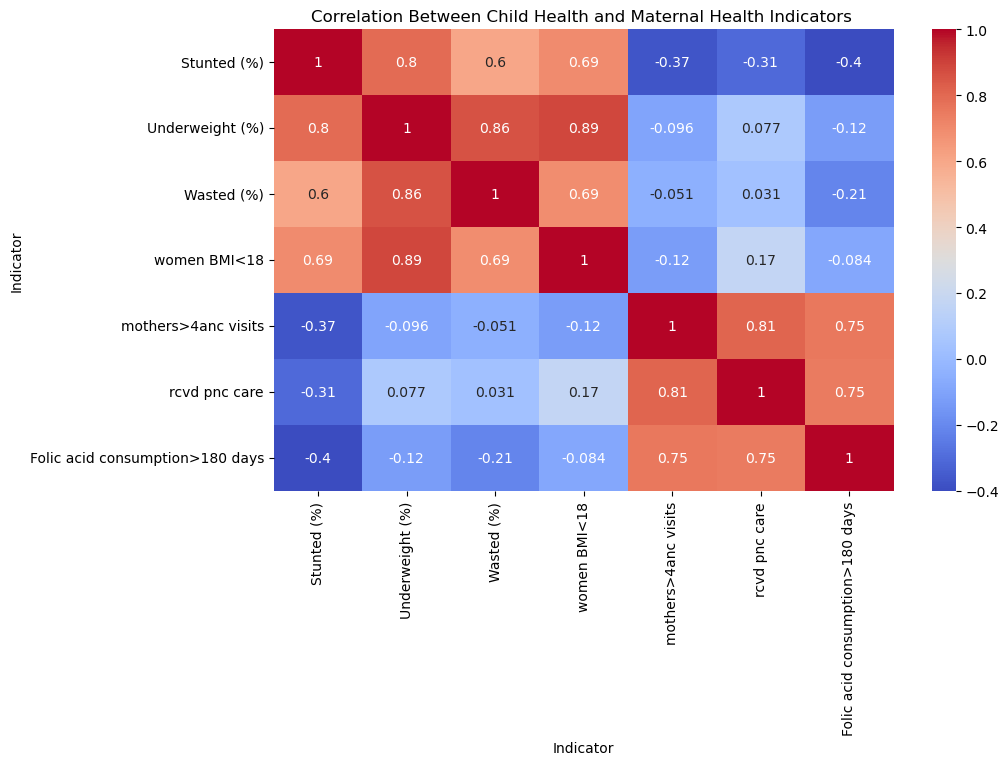

In [42]:

plt.figure(figsize=(10, 6))
sns.heatmap(maternal_child_health[["Stunted (%)","Underweight (%)","Wasted (%)","women BMI<18","mothers>4anc visits",'rcvd pnc care','Folic acid consumption>180 days']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Child Health and Maternal Health Indicators ")
plt.show()

#### Role of Women’s Education in Child Nutrition

In [46]:
womeneducation=['Women who are literate (%)',
'Women with 10 or more years of schooling (%)',
'Women age 2024 years married before age 18 years (%)']

In [47]:
women_education=df[df['Indicator'].isin(womeneducation)]

In [48]:
print(women_education.head())

                        State  ST_CEN_CD                District  \
13   Andaman & Nicobar Island         35                 Nicobar   
14   Andaman & Nicobar Island         35                 Nicobar   
15   Andaman & Nicobar Island         35                 Nicobar   
117  Andaman & Nicobar Island         35  North & Middle Andaman   
118  Andaman & Nicobar Island         35  North & Middle Andaman   

                     DISTRICT DT_CEN_CD                  Category  \
13                  Nicobar_1       1.0  Characteristics of Women   
14                  Nicobar_1       1.0  Characteristics of Women   
15                  Nicobar_1       1.0    Marriage and Fertility   
117  North & Middle Andaman_2       2.0  Characteristics of Women   
118  North & Middle Andaman_2       2.0  Characteristics of Women   

                                             Indicator  NFHS 5  NFHS 4  
13                          Women who are literate (%)    87.5     0.0  
14        Women with 10 or mor

In [49]:
filtered_avg1= women_education.groupby(['State', 'Indicator'], as_index=False)['NFHS 5'].mean()

In [50]:
women_education = filtered_avg1.pivot(index='State', 
                                  columns='Indicator', 
                                  values='NFHS 5').reset_index()

In [52]:
women_education =women_education.rename(columns={'Women age 2024 years married before age 18 years (%)':'married before 18 yrs', 
                              'Women with 10 or more years of schooling (%)' : 'wmn>10yrs schlng'  })

In [53]:
print(women_education.head())

Indicator                     State  married before 18 yrs  \
0          Andaman & Nicobar Island              14.633333   
1                    Andhra Pradesh              29.407692   
2                 Arunachal Pradesh              18.210000   
3                             Assam              30.509091   
4                             Bihar              41.071053   

Indicator  Women who are literate (%)  wmn>10yrs schlng  
0                           86.066667         50.666667  
1                           67.646154         39.446154  
2                           70.835000         38.900000  
3                           77.403030         30.224242  
4                           57.642105         28.584211  


In [54]:
print(women_education.columns)

Index(['State', 'married before 18 yrs', 'Women who are literate (%)',
       'wmn>10yrs schlng'],
      dtype='object', name='Indicator')


In [55]:
women_education_child_health=child_health.merge(women_education, on='State', how='inner')

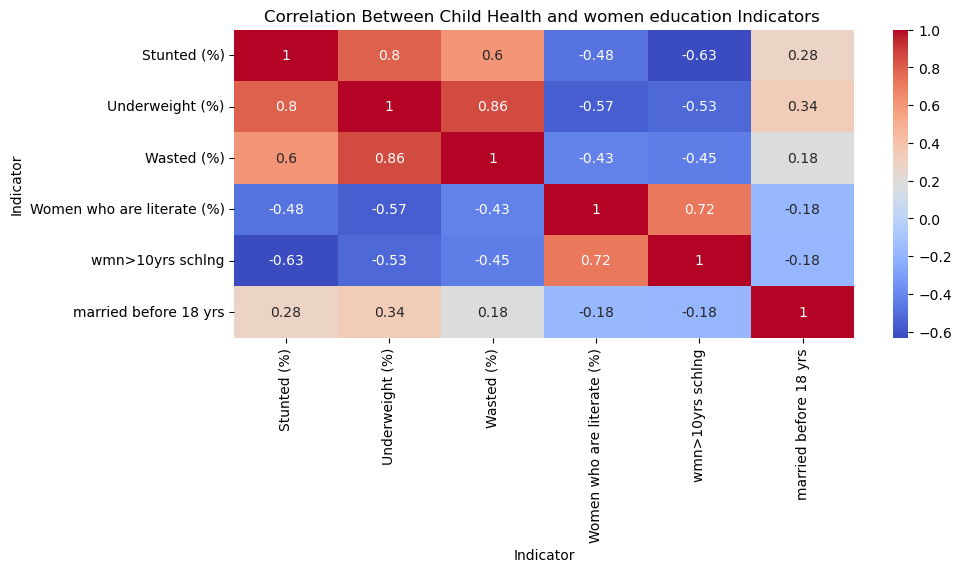

In [56]:

plt.figure(figsize=(10, 4))
sns.heatmap(women_education_child_health[["Stunted (%)","Underweight (%)","Wasted (%)","Women who are literate (%)","wmn>10yrs schlng",'married before 18 yrs']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Child Health and women education Indicators ")
plt.show()

#### Household Infrastructure and Nutrition Outcomes

In [70]:
householdindicators=['Population living in households with electricity (%)',
                   'Population living in households with an improved drinkingwater source (%)',
                    'Households using clean fuel for cooking (%)',
                     'Population living in households that use an improved sanitation facility (%)'
                    ]

In [58]:
household_environment=df[df['Indicator'].isin(householdindicators)]

In [59]:
household_environment=household_environment.groupby(['State', 'Indicator'], as_index=False)['NFHS 5'].mean()

In [60]:
household_environment = household_environment.pivot(index='State', 
                                  columns='Indicator', 
                                  values='NFHS 5').reset_index()

In [61]:
household_environment =household_environment .rename(columns={ 'Population living in households with electricity (%)':'Having electricity',
                   'Population living in households with an improved drinkingwater source (%)':'improved drinking water',
                    'Households using clean fuel for cooking (%)':'clean fuel',
                     'Population living in households that use an improved sanitation facility (%)':'improved sanitation' })

In [62]:
print(household_environment)

Indicator                     State  clean fuel  improved sanitation  \
0          Andaman & Nicobar Island   70.033333            86.400000   
1                    Andhra Pradesh   82.869231            76.700000   
2                 Arunachal Pradesh   52.280000            84.540000   
3                             Assam   39.927273            70.109091   
4                             Bihar   36.365789            49.473684   
5                        Chandigarh   95.800000            85.000000   
6                     Chhattisgarh    28.277778            72.807407   
7              Dadra & Nagar Haveli   74.300000            63.100000   
8                       Daman & Diu   88.700000            78.400000   
9                               Goa   96.450000            87.950000   
10                          Gujarat   59.845455            71.733333   
11                          Haryana   57.831818            85.027273   
12                 Himachal Pradesh   53.650000            80.90

In [63]:
Household_child_health= child_health.merge(household_environment, on='State', how='inner')

In [64]:
print(Household_child_health)

Indicator                     State  Stunted (%)  Underweight (%)  Wasted (%)  \
0          Andaman & Nicobar Island    23.233333        28.266667   18.433333   
1                    Andhra Pradesh    30.384615        28.769231   16.084615   
2                 Arunachal Pradesh    26.750000        14.115000   13.370000   
3                             Assam    35.696970        31.609091   20.687879   
4                             Bihar    42.589474        41.726316   24.247368   
5                        Chandigarh    25.300000        20.600000    8.400000   
6                     Chhattisgarh     35.674074        33.218519   19.085185   
7              Dadra & Nagar Haveli    42.400000        42.100000   20.900000   
8                       Daman & Diu    31.950000        28.900000   21.300000   
9                               Goa    26.250000        23.400000   19.550000   
10                          Gujarat    38.660606        40.330303   26.139394   
11                          

In [65]:
Household_child_health[[ 'Stunted (%)' , 'Underweight (%)',  'Wasted (%)', 'clean fuel' ,'improved sanitation' ,'Having electricity', 
                        'improved drinking water']].corr()

Indicator,Stunted (%),Underweight (%),Wasted (%),clean fuel,improved sanitation,Having electricity,improved drinking water
Indicator,,,,,,,
Stunted (%),1.000000,0.795627,0.604873,-0.469440,-0.497077,-0.441346,-0.142181
Underweight (%),0.795627,1.000000,0.858020,-0.327841,-0.553914,-0.223973,0.114803
Wasted (%),0.604873,0.858020,1.000000,-0.284851,-0.527214,-0.217372,0.049219
clean fuel,-0.469440,-0.327841,-0.284851,1.000000,0.346523,0.596937,0.472087
improved sanitation,-0.497077,-0.553914,-0.527214,0.346523,1.000000,0.282887,0.195583
Having electricity,-0.441346,-0.223973,-0.217372,0.596937,0.282887,1.000000,0.469301
improved drinking water,-0.142181,0.114803,0.049219,0.472087,0.195583,0.469301,1.000000


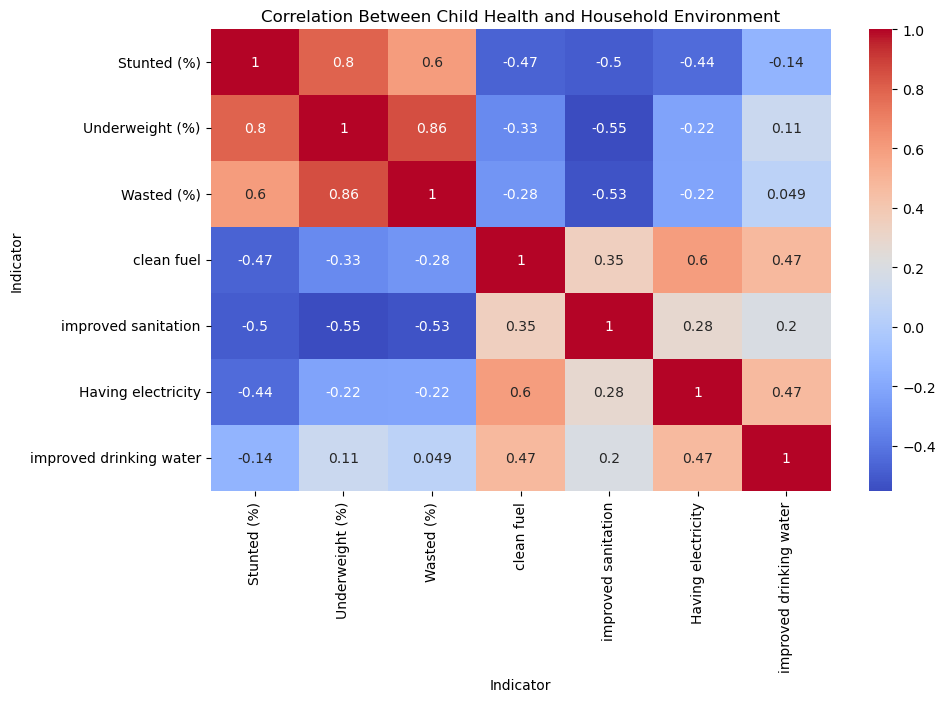

In [66]:

plt.figure(figsize=(10, 6))
sns.heatmap(Household_child_health[["Stunted (%)","Underweight (%)","Wasted (%)",'clean fuel','improved sanitation','Having electricity','improved drinking water']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Child Health and Household Environment")
plt.show()

#### 

#### Impact of Child Feeding Practices on Nutrition

In [53]:
childfeeding=['Breastfeeding children age 6-23 months receiving an adequate diet (%)',
'Children age 6-8 months receiving solid or semisolid food and breastmilk (%)',
'Children under age 3 years breastfed within one hour of birth (%)']

In [54]:
child_feeding_practices=df[df['Indicator'].isin(childfeeding)]

In [55]:
filtered_avg2=child_feeding_practices.groupby(['State', 'Indicator'], as_index=False)['NFHS 5'].mean()

In [56]:
child_feeding_practices= filtered_avg2.pivot(index='State', 
                                  columns='Indicator', 
                                  values='NFHS 5').reset_index()

In [57]:
child_feeding_practices=child_feeding_practices.rename(columns={ 'Breastfeeding children age 6-23 months receiving an adequate diet (%)':'Adequate Diet',
'Children age 6-8 months receiving solid or semisolid food and breastmilk (%)':'Children aged 6-8 months receiving  breastmilk (%)',
'Children under age 3 years breastfed within one hour of birth (%)': 'Under age 3 child breastfed within one hour of birth (%)'})

In [58]:
print(child_feeding_practices)

Indicator                     State  Adequate Diet  \
0          Andaman & Nicobar Island      16.066667   
1                    Andhra Pradesh       8.461538   
2                 Arunachal Pradesh      22.975000   
3                             Assam       9.221212   
4                             Bihar       9.502632   
5                        Chandigarh      22.700000   
6                     Chhattisgarh       10.581481   
7              Dadra & Nagar Haveli       9.600000   
8                       Daman & Diu      14.550000   
9                               Goa      17.900000   
10                          Gujarat       6.551515   
11                          Haryana      12.290909   
12                 Himachal Pradesh      17.483333   
13                  Jammu & Kashmir      11.171429   
14                        Jharkhand      10.062500   
15                        Karnataka      11.863333   
16                           Kerala      24.185714   
17                          

In [59]:
child_feeding_practices_child_health=child_health.merge(child_feeding_practices, on='State', how='inner')

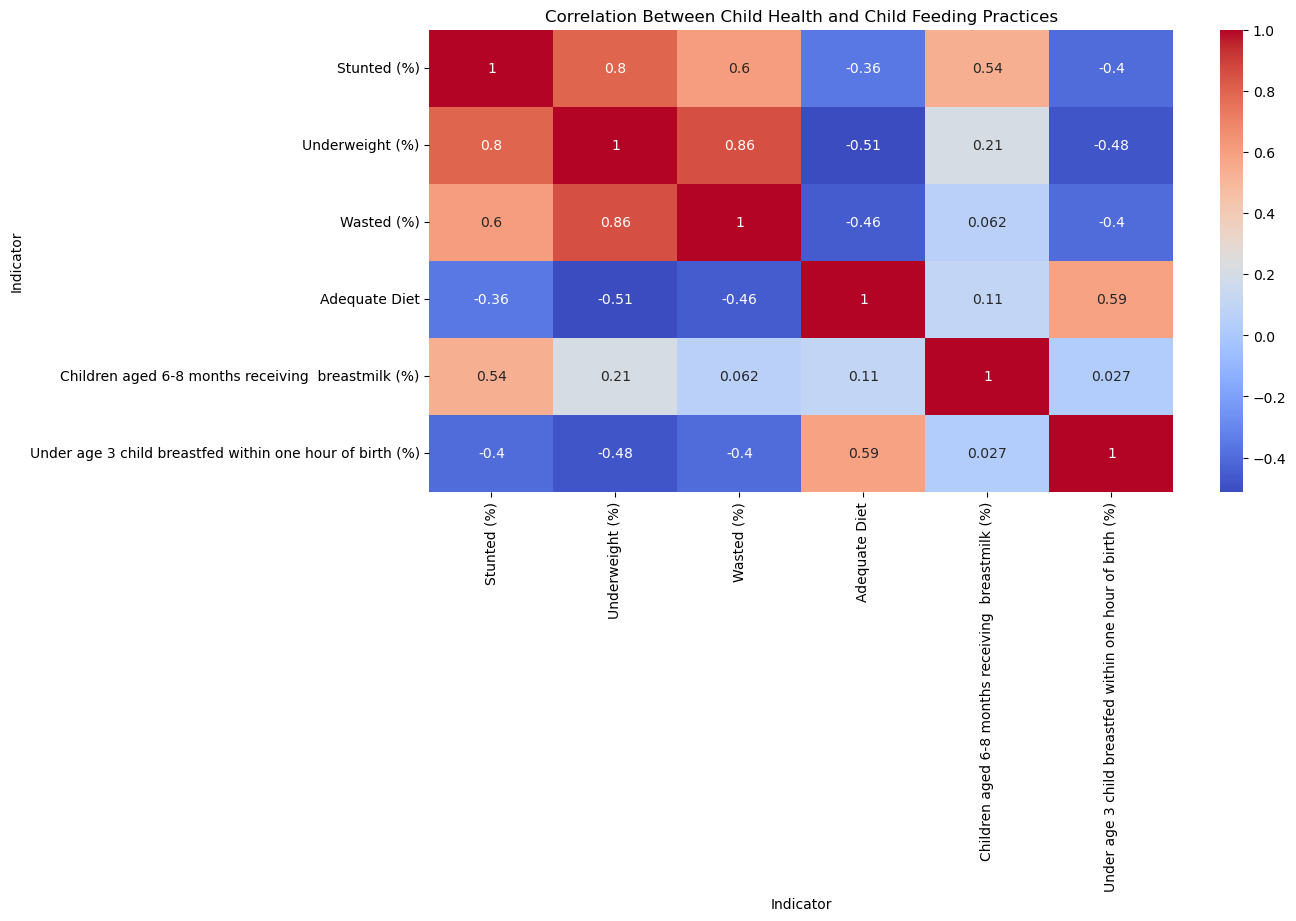

In [60]:

plt.figure(figsize=(12, 6))
sns.heatmap(child_feeding_practices_child_health[["Stunted (%)","Underweight (%)","Wasted (%)",'Adequate Diet','Children aged 6-8 months receiving  breastmilk (%)','Under age 3 child breastfed within one hour of birth (%)']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Child Health and Child Feeding Practices")
plt.show()